In [ ]:
pip install scikit-learn

In [28]:
from ucimlrepo import fetch_ucirepo 
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
  
# fetch dataset 
iris = fetch_ucirepo(id=53) 

# Data Initialization

# data (as pandas dataframes) 
X = iris.data.features 
y = iris.data.targets 
z = iris.data.original

print("Isi Iris Dataset:")
print(z.head())

print("Statistik Dataset Iris:")
print(z.describe())

print("Tipe Data Dataset Iris:")
print(z.dtypes)

print("Informasi Dataset Iris:")
print(z.info())


Isi Iris Dataset:
   sepal length  sepal width  petal length  petal width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
Statistik Dataset Iris:
       sepal length  sepal width  petal length  petal width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000
Tipe

In [29]:
# Data Preprocessing

# Standardization dengan Z-score normalization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

print("Dataset Setelah Scaling:")
print(X_scaled_df.head())



Dataset Setelah Scaling:
   sepal length  sepal width  petal length  petal width
0     -0.900681     1.032057     -1.341272    -1.312977
1     -1.143017    -0.124958     -1.341272    -1.312977
2     -1.385353     0.337848     -1.398138    -1.312977
3     -1.506521     0.106445     -1.284407    -1.312977
4     -1.021849     1.263460     -1.341272    -1.312977


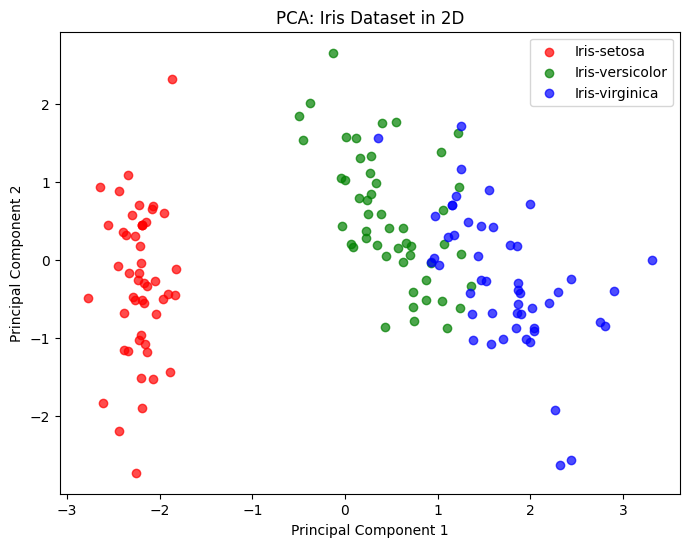

In [30]:
# Implementasi PCA

# Step 1: Hitung Mean dari Setiap Fitur (Centering Data)
X_centered = X_scaled - np.mean(X_scaled, axis=0)

# Step 2: Hitung Matriks Kovarians
cov_matrix = np.cov(X_centered.T)

# Step 3: Hitung Eigenvalues dan Eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Step 4: Urutkan Eigenvalues dan Eigenvectors dari yang terbesar
sorted_indices = np.argsort(eigenvalues)[::-1]  # Urutkan dari besar ke kecil
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Step 5: Pilih 2 Komponen Utama (PCA ke 2D)
top_2_eigenvectors = eigenvectors[:, :2]
X_pca = np.dot(X_centered, top_2_eigenvectors)

# Konversi ke DataFrame biar gampang dibaca
X_pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
X_pca_df['Class'] = iris.data.targets

# Visualisasi hasil PCA
plt.figure(figsize=(8,6))
for target, color in zip(X_pca_df['Class'].unique(), ['r', 'g', 'b']):
    subset = X_pca_df[X_pca_df['Class'] == target]
    plt.scatter(subset['PC1'], subset['PC2'], label=target, alpha=0.7, c=color)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: Iris Dataset in 2D')
plt.legend()
plt.show()

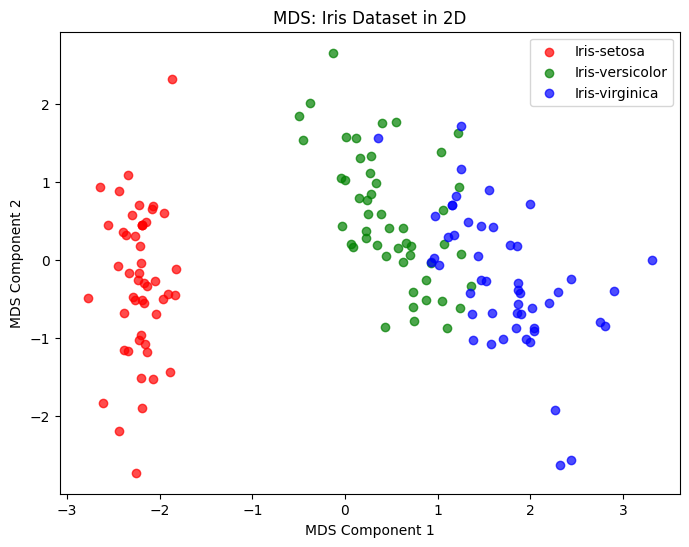

In [ ]:
# Implementasi MDS dengan Euclidean Distance

# Step 1: Hitung Jarak Euclidean Antar Semua Titik
distance_matrix = squareform(pdist(X_scaled, metric='euclidean'))

# Step 2: Bangun Matriks Jarak yang Ditransformasi (Double Centering)
n = distance_matrix.shape[0]
H = np.eye(n) - (1/n) * np.ones((n, n))  # Matriks centering
B = -0.5 * H @ (distance_matrix ** 2) @ H  # Transformasi matriks jarak

# Step 3: Hitung Eigenvalues dan Eigenvectors
eigenvalues, eigenvectors = np.linalg.eigh(B)  # eigh untuk matriks simetris

# Step 4: Urutkan Eigenvalues dan Eigenvectors dari yang terbesar
sorted_indices = np.argsort(eigenvalues)[::-1]  # Urutkan dari besar ke kecil
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Step 5: Pilih 2 Komponen Utama (MDS ke 2D)
top_2_eigenvectors = eigenvectors[:, :2] * np.sqrt(eigenvalues[:2])  # Skalakan dengan sqrt(eigenvalue)
X_mds = top_2_eigenvectors

# Konversi ke DataFrame agar lebih mudah dibaca
X_mds_df = pd.DataFrame(X_mds, columns=['MDS1', 'MDS2'])
X_mds_df['Class'] = iris.data.targets

# Visualisasi hasil MDS
plt.figure(figsize=(8,6))
for target, color in zip(X_mds_df['Class'].unique(), ['r', 'g', 'b']):
    subset = X_mds_df[X_mds_df['Class'] == target]
    plt.scatter(subset['MDS1'], subset['MDS2'], label=target, alpha=0.7, c=color)

plt.xlabel('MDS Component 1')
plt.ylabel('MDS Component 2')
plt.title('MDS: Iris Dataset in 2D')
plt.legend()
plt.show()

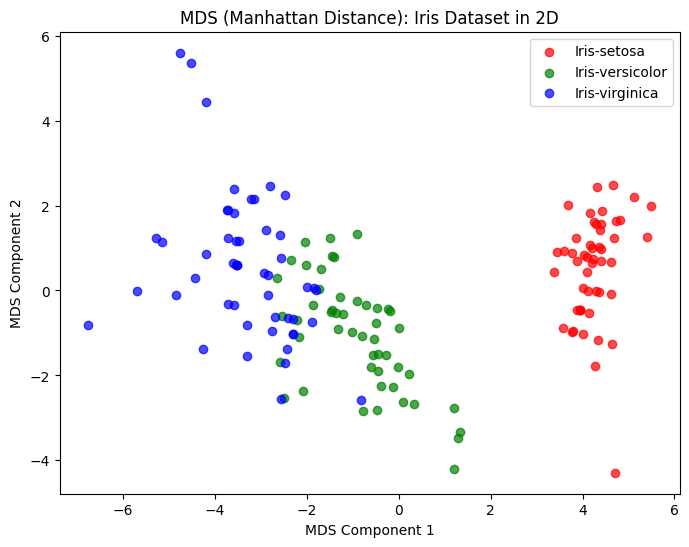

In [32]:
# Step 1: Hitung Jarak Manhattan Antar Semua Titik
distance_matrix = squareform(pdist(X_scaled, metric='cityblock'))

# Step 2: Bangun Matriks Jarak yang Ditransformasi (Double Centering)
n = distance_matrix.shape[0]
H = np.eye(n) - (1/n) * np.ones((n, n))  # Matriks centering
B = -0.5 * H @ (distance_matrix ** 2) @ H  # Transformasi matriks jarak

# Step 3: Hitung Eigenvalues dan Eigenvectors
eigenvalues, eigenvectors = np.linalg.eigh(B)  # eigh untuk matriks simetris

# Step 4: Urutkan Eigenvalues dan Eigenvectors dari yang terbesar
sorted_indices = np.argsort(eigenvalues)[::-1]  # Urutkan dari besar ke kecil
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Step 5: Pilih 2 Komponen Utama (MDS ke 2D)
top_2_eigenvectors = eigenvectors[:, :2] * np.sqrt(eigenvalues[:2])  # Skalakan dengan sqrt(eigenvalue)
X_mds = top_2_eigenvectors

# Konversi ke DataFrame agar lebih mudah dibaca
X_mds_df = pd.DataFrame(X_mds, columns=['MDS1', 'MDS2'])
X_mds_df['Class'] = iris.data.targets

# Visualisasi hasil MDS
plt.figure(figsize=(8,6))
for target, color in zip(X_mds_df['Class'].unique(), ['r', 'g', 'b']):
    subset = X_mds_df[X_mds_df['Class'] == target]
    plt.scatter(subset['MDS1'], subset['MDS2'], label=target, alpha=0.7, c=color)

plt.xlabel('MDS Component 1')
plt.ylabel('MDS Component 2')
plt.title('MDS (Manhattan Distance): Iris Dataset in 2D')
plt.legend()
plt.show()

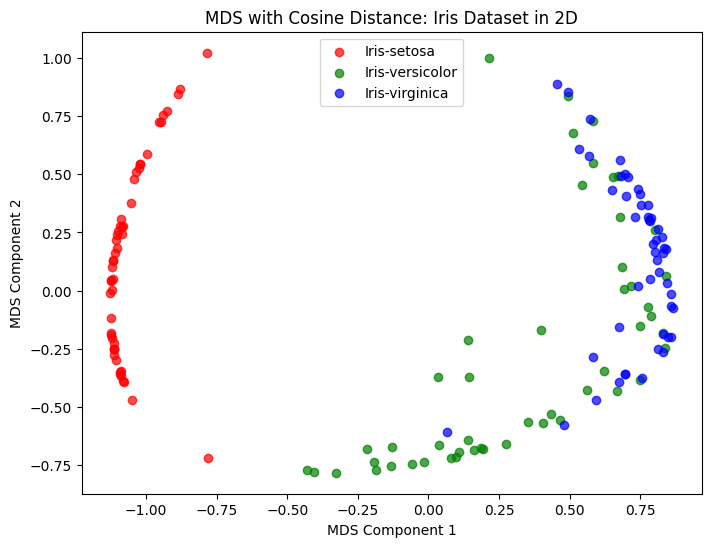

In [33]:
# Implementasi MDS dengan Cosine Distance

# Step 1: Compute Cosine Distance Matrix
distance_matrix = squareform(pdist(X_scaled, metric='cosine'))

# Step 2: Construct Double-Centered Distance Matrix
n = distance_matrix.shape[0]
H = np.eye(n) - (1/n) * np.ones((n, n))  # Centering matrix
B = -0.5 * H @ (distance_matrix ** 2) @ H  # Transformed distance matrix

# Step 3: Compute Eigenvalues and Eigenvectors
eigenvalues, eigenvectors = np.linalg.eigh(B)  # eigh for symmetric matrix

# Step 4: Sort Eigenvalues and Eigenvectors in Descending Order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Step 5: Select Top 2 Components
X_mds_cosine = eigenvectors[:, :2] * np.sqrt(eigenvalues[:2])

# Convert to DataFrame
X_mds_df = pd.DataFrame(X_mds_cosine, columns=['MDS1', 'MDS2'])
X_mds_df['Class'] = y.values.ravel()

# Step 6: Visualization
plt.figure(figsize=(8,6))
for target, color in zip(X_mds_df['Class'].unique(), ['r', 'g', 'b']):
    subset = X_mds_df[X_mds_df['Class'] == target]
    plt.scatter(subset['MDS1'], subset['MDS2'], label=target, alpha=0.7, c=color)

plt.xlabel('MDS Component 1')
plt.ylabel('MDS Component 2')
plt.title('MDS with Cosine Distance: Iris Dataset in 2D')
plt.legend()
plt.show()